# Final Project Report

# Introduction:

Hi! Welcome to our Final Project Report. 

The question that we are addressing is: "What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?"

The features that we chose are: the number of played hours and age.

As a result, despite given two separate datasets, we will only be working with the **players** dataset as all our variables are included.

In order to tackle this, we will first load the data. Wrangle/clean the data. Create visualization and perform the data analysis.

# Methods & Results:

To start, let's first load the data and create a data frame named **players**.

In [4]:
set.seed(001)
library(tidyverse)
library(tidymodels)

players_url <- "https://raw.githubusercontent.com/coreyubc/project_individual/refs/heads/main/players.csv"

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [5]:
players <- read_csv(players_url)
head(players)


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Next, let's compute the **mean** value for each quantitative variable in the players.csv data set. Report the mean values in a **table format**.

In [6]:
mean_player <- players |>
    summarize(playedhrs_avg = mean(played_hours), 
             Age_avg = mean(Age, na.rm = TRUE))
mean_player

Playedhrs_avg,Age_avg
<dbl>,<dbl>
5.845918,20.52062


Next, let's use a scatter plot to plot played hours and age and use colors to differentiate between whether the player has subscribed or not. Both played hours and age are double data types and I am looking for a relationship between the two and a third variable, subscription. Therefore scatter plot is the best choice.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


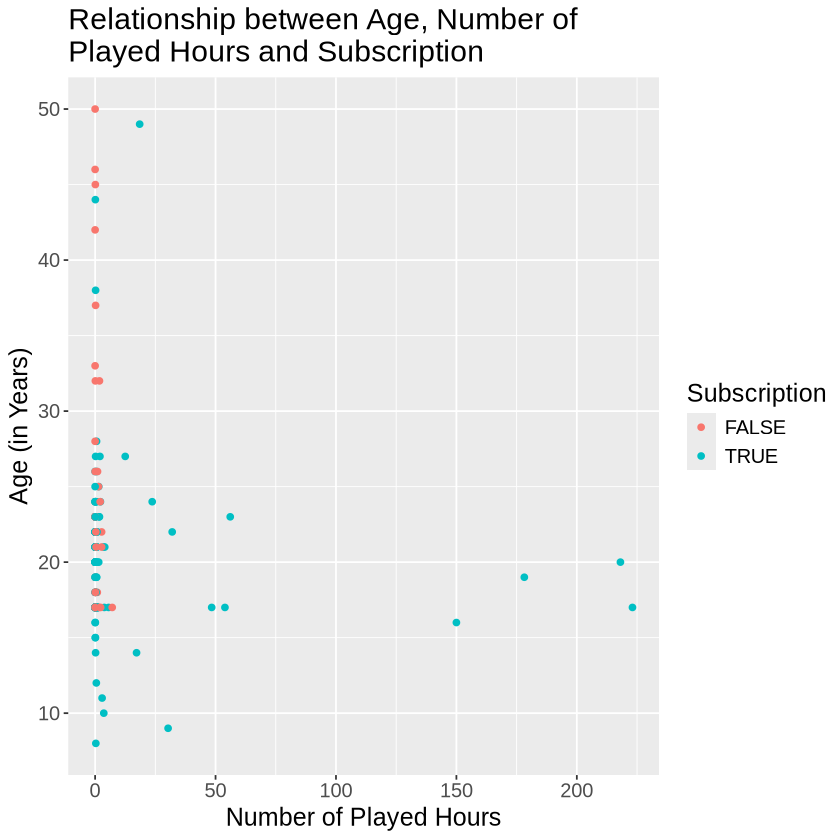

In [12]:
plot <- players |>
    ggplot(aes(x = played_hours, y = Age, color = subscribe)) +
    geom_point() +
    labs(x = "Number of Played Hours",
         y = "Age (in Years)",
         color = "Subscription",
        title = "Relationship between Age, Number of \nPlayed Hours and Subscription") +
    theme(text = element_text(size = 15))
plot

The problem with this plot is that the values are most dense within ~ 0-10 of played hrs. Let's cap the plot to this range and see if it helps with visualization.

**FIRST!!! Remove rows with NA in Age and cap played_hours at 10 hours.**

In [11]:
players_clean <- players |>
  filter(!is.na(Age)) |>               
  mutate(played_hours_capped = pmin(played_hours, 10))
head(players_clean)

experience,subscribe,hashedEmail,played_hours,name,gender,Age,played_hours_capped
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,10.0
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3.8
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,0.0
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,0.7
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,0.1
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,0.0


NEXT, let's select the 3 variables that are important to us and add it to a dataframe called unscaled_data.

In [15]:
unscaled_data <- players_clean |>
    select(Age, played_hours_capped, subscribe) |>
    as_tibble()

head(unscaled_data)

Age,played_hours_capped,subscribe
<dbl>,<dbl>,<lgl>
9,10.0,TRUE
17,3.8,TRUE
17,0.0,FALSE
21,0.7,TRUE
21,0.1,TRUE
17,0.0,TRUE


Next, we will have to change the data type from logical to factor and standardize the data points.

In [16]:
unscaled_data <- unscaled_data |>
    mutate(subscribe = as_factor(subscribe)) |>
    mutate(subscribe = fct_recode(subscribe, "Subscribed" = "TRUE", "Not_Subscribed" = "FALSE"))

head(unscaled_data)

Age,played_hours_capped,subscribe
<dbl>,<dbl>,<fct>
9,10.0,Subscribed
17,3.8,Subscribed
17,0.0,Not_Subscribed
21,0.7,Subscribed
21,0.1,Subscribed
17,0.0,Subscribed


Good. Now let's plot **unscaled_data** with the capped range.

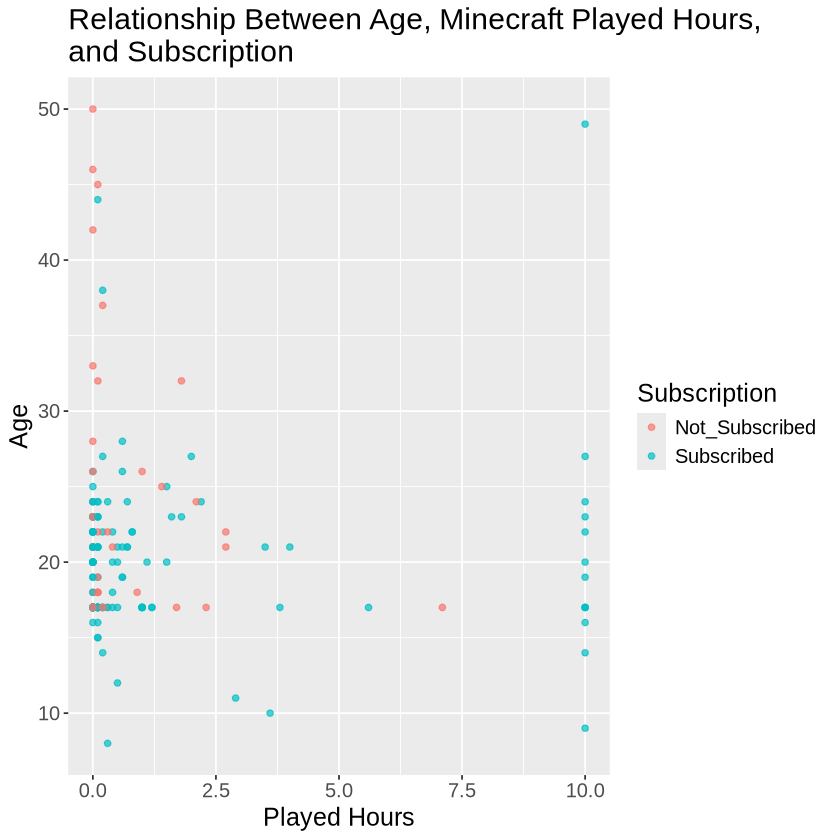

In [20]:
unscaled_plot <- unscaled_data |>
    ggplot(aes(x = played_hours_capped, y = Age, color = subscribe)) +
    geom_point(alpha = 0.7) +
    labs(y = "Age",
         x = "Played Hours",
         color = "Subscription",
         title = "Relationship Between Age, Minecraft Played Hours,\nand Subscription"
         ) +
    theme(text = element_text(size = 15))
unscaled_plot

Now this looks WAY cleaner. We can actually see the individual data points.

Description:  
- It also looks like the higher in ages, the less likely it is for the player to subscribe to a newsletter. It seems from this plot alone that the number of played hours don't have much of an influence to subscription as there is no clear bias towards one or the other in the range of the played hours. However, age seems to carry more of an importance here as clearly, the younger the player, the more likely they are to be subscribed, and vice versa.
- It seems like a good plot to use K-nn regression over linear regression as there is no clear linear trend. There is no assumptions here since it is clear that there is no significant linear relationship, which only leaves K-nn regression. A potential limitation or weakness of this method selected is it cannot distinguish whether a point is an outlier or not so we would have to eliminate the outliers first, which we have already done. 

**Before** actually doing any classification analysis, let's create 2 histograms: played hours and subscription + age and subscription to visualize any other interesting findings as part of our exploratory data analysis.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”


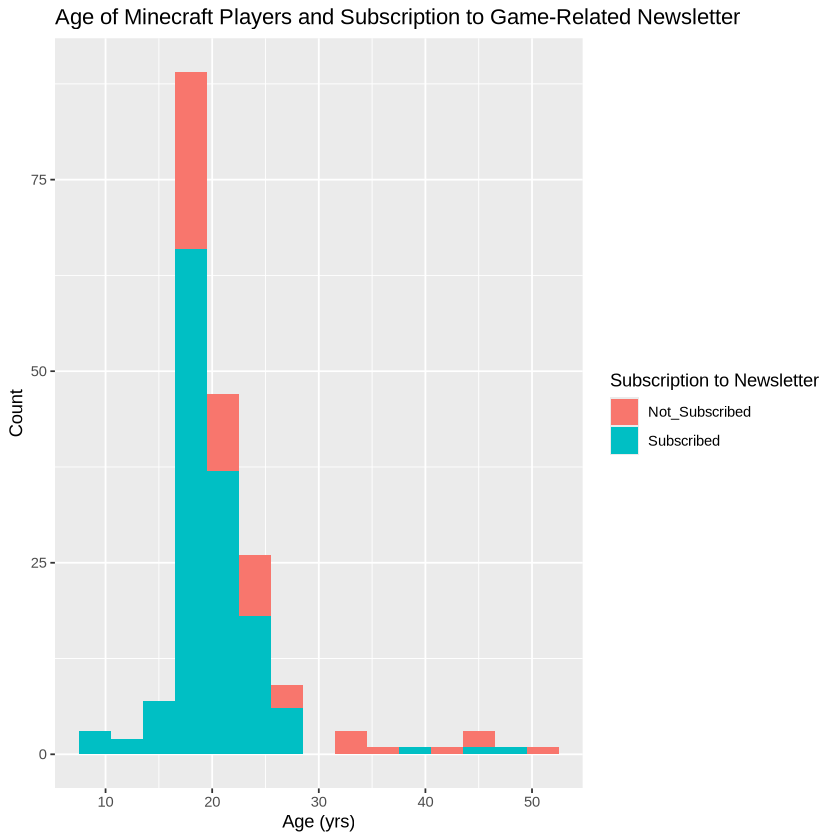

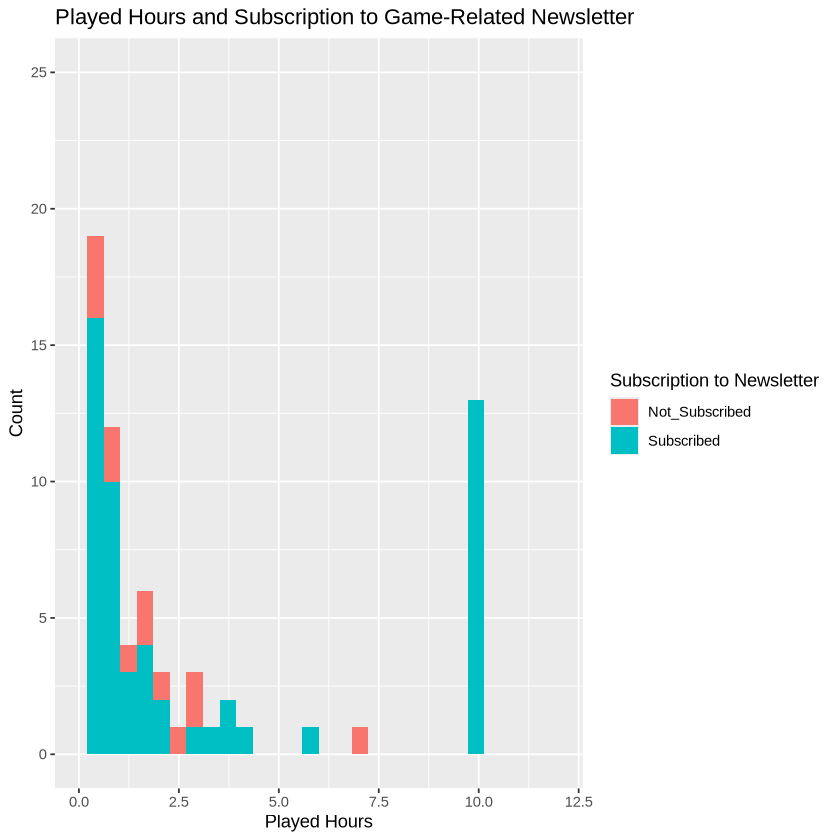

In [37]:
age_hist <- unscaled_data |>
    ggplot(aes(x = Age, fill = as_factor(subscribe))) +
    geom_histogram(binwidth = 3) +
    labs(x = "Age (yrs)",
         y = "Count",
        fill = "Subscription to Newsletter",
        title = "Age of Minecraft Players and Subscription to Game-Related Newsletter")

age_hist

playedhrs_hist <- unscaled_data |>
    ggplot(aes(x = played_hours_capped, fill = as_factor(subscribe))) +
    geom_histogram() +
    xlim(c(0),(12))+
    ylim(c(0),(25))+
    labs(x = "Played Hours",
         y = "Count",
        fill = "Subscription to Newsletter",
        title = "Played Hours and Subscription to Game-Related Newsletter")

playedhrs_hist

**Plot Description**: Age has more variability of subscription compared to played hours. There is an overall more players subscribed to game-related newsletter across both graphs. Especially for Played Hrs, it looks like only the players that play less hrs (<5 hrs) are not subscribed.

Now we will use K-nn regression over linear regression as there is no clear linear trend. There is no assumptions here since it is clear that there is no significant linear relationship, which only leaves K-nn regression. A potential limitation or weakness of this method selected is it cannot distinguish whether a point is an outlier or not so we would have to eliminate the outliers first, which we have already done. In order to process the data to apply the model, we will split the data to 70/30 during the initial splitting. Then do cross-validation to determine the best K values. And then use that K value to predict.

First lets split the data 70/30 during the intial split using the unscaled data. Extract training set (70% of data) and extract test set (30% of data). 

In [92]:
player_split <- initial_split(unscaled_data, prop = 0.70, strata = subscribe)
player_train <- training(player_split)
player_test <- testing(player_split)

Cross validation to find the best k!

*Define preprocessing steps: scale and center predictors (Age, played_hours)*

In [93]:
recipe <- recipe(subscribe ~ played_hours_capped + Age, data = player_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

*Prepare (prep) the recipe using training data (calculates scaling factors), bake the recipe to training data and the the same scaling to test data (using training set's scaling factors)*

In [94]:
prepped_recipe <- prep(recipe, training = player_train)

train_scaled <- bake(prepped_recipe, new_data = player_train)

test_scaled <- bake(prepped_recipe, new_data = player_test)

Define KNN model with:
   - Rectangular weights 
   - Tuneable neighbors 
   - Use tune() for optimal k

In [95]:
knn_spec <- nearest_neighbor(weight_func = "rectangular",  neighbors = tune()) |>           
  set_engine("kknn") |> 
  set_mode("classification")

knn_workflow <- workflow() |>
  add_recipe(recipe) |>
  add_model(knn_spec)

cv_folds <- vfold_cv(player_train, v = 5)

k_grid <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

knn_results <- workflow() |>
  add_recipe(recipe) |>           
  add_model(knn_spec) |>         
  tune_grid(
    resamples = cv_folds,         
    grid = k_grid) |>
  collect_metrics()              

*Now filter to find the k that maximizes cross-validated accuracy.*

In [96]:
accuracies <- knn_results |>
  filter(.metric == "accuracy")   

accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4814815,5,0.03098741,Preprocessor1_Model01
6,accuracy,binary,0.5333333,5,0.03813196,Preprocessor1_Model02
11,accuracy,binary,0.6000000,5,0.05418051,Preprocessor1_Model03
16,accuracy,binary,0.7185185,5,0.03008903,Preprocessor1_Model04
21,accuracy,binary,0.7333333,5,0.03954473,Preprocessor1_Model05
26,accuracy,binary,0.7333333,5,0.03954473,Preprocessor1_Model06
31,accuracy,binary,0.7333333,5,0.03954473,Preprocessor1_Model07
36,accuracy,binary,0.7333333,5,0.03954473,Preprocessor1_Model08
41,accuracy,binary,0.7333333,5,0.03954473,Preprocessor1_Model09


*Create a plot to look at visualize the differences between high k and low k. But most importantly to get k at the which is at the "elbow" of the curve.*

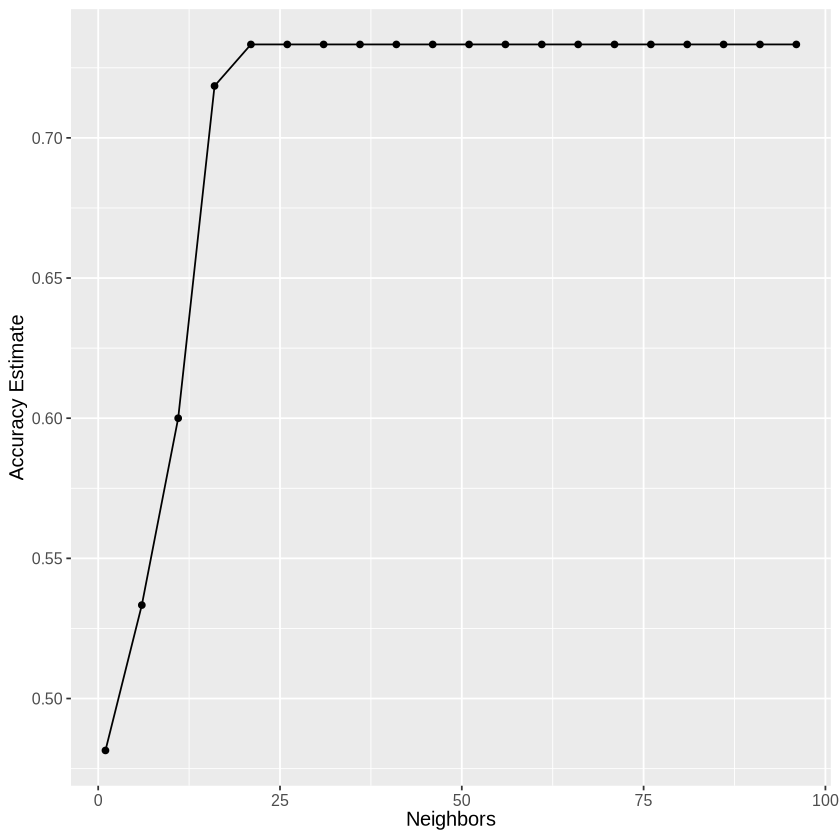

In [97]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))

accuracy_vs_k

*To ensure we have chosen the correct k value we can also select k with highest mean accuracy
(from accuracies)*

In [98]:
best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k #21 

[1] 21

Now we have found the best k we can test it out on our data!

In [99]:
playerbest_recipe <- recipe(subscribe ~ Age + played_hours_capped, data = player_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_wf <- workflow() |>
  add_recipe(playerbest_recipe) |>  # Preprocessing steps
  add_model(knn_spec)  

knn_fit <- knn_wf |> 
  fit(data = player_train)

knn_fit

test_predictions <- predict(knn_fit, new_data = player_test)

test_results <- player_test |> 
  bind_cols(test_predictions)

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(21,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2444444
Best kernel: rectangular
Best k: 21

*Evaluate preformance*

In [100]:
conf_mat(test_results, truth = subscribe, estimate = .pred_class)
accuracy(test_results, truth = subscribe, estimate = .pred_class)

                Truth
Prediction       Not_Subscribed Subscribed
  Not_Subscribed              0          1
  Subscribed                 16         42

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7118644


*Okay there are a few problems including the fact that our confusion matrix shows us our predictive model failed to identify "Not_Subscribed" cases. It misclassified all 16 true "Not_Subscribed" users as "Subscribed" (false negatives). So our model that always guesses "Subscribed." We predict that this may have happened is because Age has no mathematical relationship with subscription status. So, our analysis found no evidence that age or playtime predict subscriptions.*

To double check it wasn't due to our model we checked the correlation. 

In [102]:
unscaled_data |>  
  mutate(subscribe_num = as.numeric(subscribe == "Subscribed")) |>  
  summarise(
    cor_hrs = cor(subscribe_num, played_hours_capped),  
    cor_age = cor(subscribe_num, Age)  
  )  

cor_hrs,cor_age
<dbl>,<dbl>
0.1409789,-0.2417285


Since its near 0 and actually negative for the Age variable we can conclude that we cannot use the predictors Age and played_hours to determind if a participant is subcribed.  

# Discussion: